<a href="https://colab.research.google.com/github/narsym/Mnist-digit-classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and data

In [0]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras

In [0]:
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
%matplotlib inline

Exploring digits

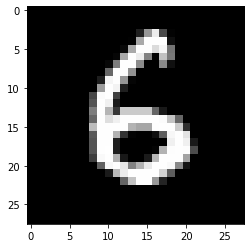

In [0]:
digit = 106
a = x_train[digit]
plt.imshow(a,cmap = 'gray',interpolation = 'nearest')

In [0]:
x_train.shape

(60000, 28, 28)

Libraries for the model building

In [0]:
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from tensorflow.keras import backend as K

Changing image shape as per the backend

In [0]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
y_train.shape

(60000,)

Encoding output classes

In [0]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

Building model

In [0]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Input(shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Training model

In [0]:
model.fit(x_train,y_train,batch_size = 128,epochs = 12,verbose = 2,validation_data = (x_test,y_test))

Epoch 1/12
469/469 - 7s - loss: 0.2449 - accuracy: 0.9254 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 2/12
469/469 - 7s - loss: 0.0889 - accuracy: 0.9736 - val_loss: 0.0449 - val_accuracy: 0.9855
Epoch 3/12
469/469 - 7s - loss: 0.0643 - accuracy: 0.9811 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 4/12
469/469 - 7s - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 5/12
469/469 - 7s - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0303 - val_accuracy: 0.9915
Epoch 6/12
469/469 - 7s - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 7/12
469/469 - 7s - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 8/12
469/469 - 7s - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 9/12
469/469 - 7s - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 10/12
469/469 - 7s - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0365 - val_accuracy: 0.9899

Evaluating the model

In [0]:
score = model.evaluate(x_test,y_test)
print('Test loss:',score[0])
print('Test accuracy',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0302 - accuracy: 0.9919
Test loss: 0.030180178582668304
Test accuracy 0.9919000267982483


We got 99.19% accuracy on the test set